[[Model]]
    Model(cum_gauss)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 7
    # variables        = 4
    chi-square         = 9.1303e-04
    reduced chi-square = 3.0434e-04
    Akaike info crit   = -54.6125353
    Bayesian info crit = -54.8288947
    R-squared          = 0.99899112
##  Warning: uncertainties could not be estimated:
[[Variables]]
    mu:       2.5995e-10 (init = 0)
    sigma:    1.04103774 (init = 1)
    gamma:    0.05911388 (init = 0)
    lambda_:  0.05911388 (init = 0)


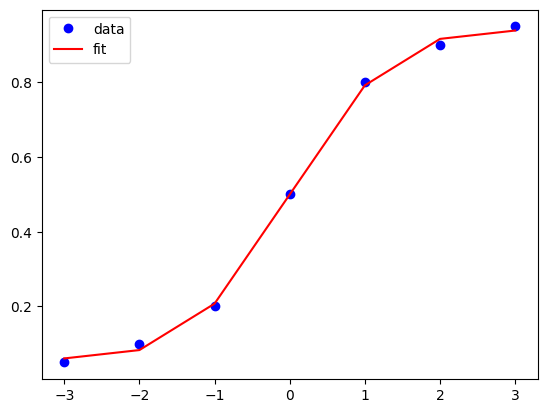

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import Model #creates a Model class
from scipy.special import erf

# Define the cumulative Gaussian function
def cum_gauss(x, mu, sigma, gamma, lambda_):
    return gamma + (1 - gamma - lambda_) * 0.5 * (1 + erf((x - mu) / (sigma * np.sqrt(2))))

# Generate some example data
xdata = np.array([-3, -2, -1, 0, 1, 2, 3])
ydata = np.array([0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95])

# Define the model and initialize the parameters
model = Model(cum_gauss)
params = model.make_params(mu=0, sigma=1, gamma=0, lambda_=0)

# Fit the model to the data
result = model.fit(ydata, params, x=xdata)

# Print the fit results
print(result.fit_report())

# Plot the data and the fit
plt.plot(xdata, ydata, 'bo', label='data')
plt.plot(xdata, result.best_fit, 'r-', label='fit')
plt.legend()
plt.show()